In [202]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

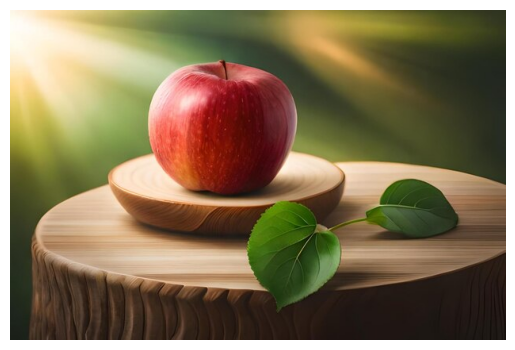

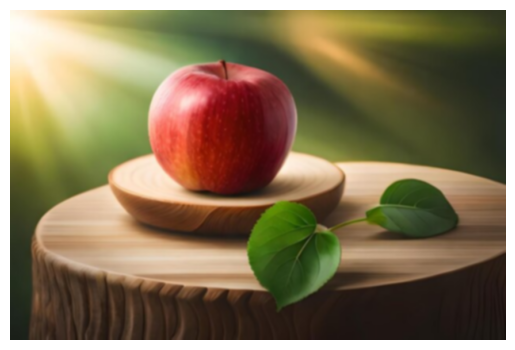

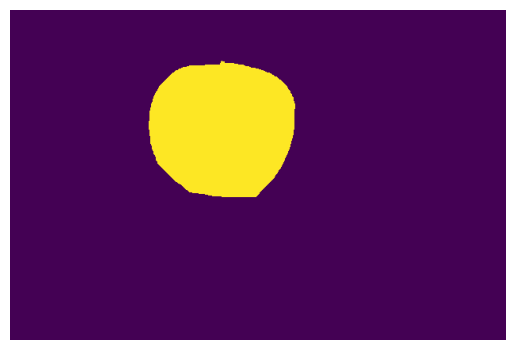

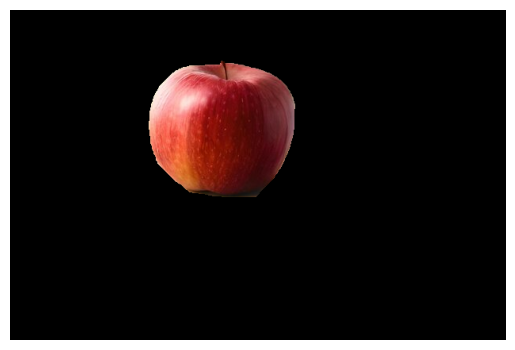

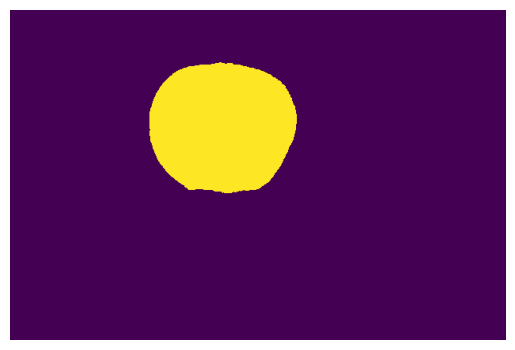

Dice:  0.9586325320012489


In [ ]:
# GrabCut with blur

# Original Image
image1 = cv.cvtColor(cv.imread("image1.jpg"), cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image1)
plt.show()

# Masks and Models GrabCut Segmentation
mask = np.zeros(image1.shape[:2], np.uint8)
bgmodel = np.zeros((1, 65), np.float64)
fgmodel = np.zeros((1, 65), np.float64)

# Kernel for Blur
blur = cv.GaussianBlur(image1, (5, 5), 0)

plt.axis("off")
plt.imshow(blur)
plt.show()

# Approximate apple coords for GrabCut
rect = (160, 60, 360, 210)
cv.grabCut(blur, mask, rect, bgmodel, fgmodel, 5, cv.GC_INIT_WITH_RECT)
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
grabcut = cv.bitwise_and(image1, image1, mask=mask)

# Mask
plt.axis("off")
plt.imshow(mask)
plt.show()

# Image after GrabCut
plt.axis("off")
plt.imshow(grabcut)
plt.show()

# Dice
myImage = cv.imread("image1_cut.jpg")
ret, myMask = cv.threshold(cv.cvtColor(myImage, cv.COLOR_BGR2GRAY), 245, 255, cv.THRESH_BINARY)
myMaskBin = (myMask > 0).astype(np.uint8)
intersections = np.sum(mask * myMaskBin)
sumMyMaskBin = np.sum(myMaskBin)
sumMask = np.sum(mask)

# Mask from image
plt.axis("off")
plt.imshow(myMaskBin)
plt.show()

# Dice
dice = 2.0 * intersections / (sumMask + sumMask)
print("Dice: ", dice)

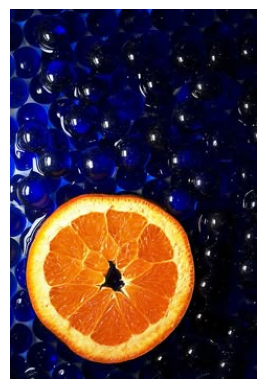

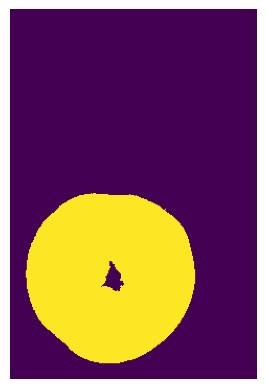

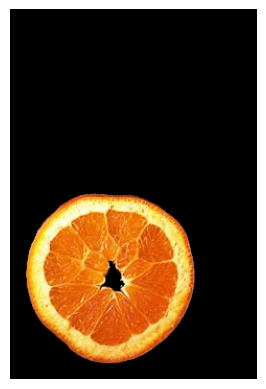

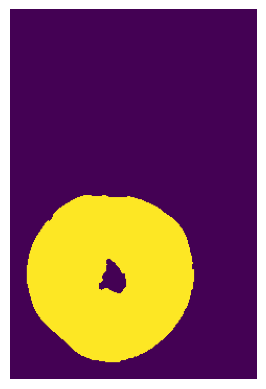

Dice:  0.9520925652387986


In [ ]:
# Color

# Original Image
image2 = cv.cvtColor(cv.imread("image2.jpg"), cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image2)
plt.show()

# HSV (Hue Saturation Value)
hsv = cv.cvtColor(image2, cv.COLOR_RGB2HSV)
lr = (0, 10, 75)
ur = (70, 255, 255)
maskr = cv.inRange(hsv, lr, ur)

# Mask
plt.axis("off")
plt.imshow(maskr)
plt.show()

# Image after Color
color = cv.bitwise_and(image2, image2, mask=maskr)
plt.axis("off")
plt.imshow(color)
plt.show()

# Dice
myImage = cv.imread("image2_cut.jpg")
ret, myMask = cv.threshold(cv.cvtColor(myImage, cv.COLOR_BGR2GRAY), 245, 255, cv.THRESH_BINARY)
myMaskBin = (myMask > 0).astype(np.uint8)
intersections = np.sum(maskr * myMaskBin)
sumMyMaskBin = np.sum(myMaskBin)
sumMask = np.sum(maskr)

# Mask from image
plt.axis("off")
plt.imshow(myMaskBin)
plt.show()

# Dice
dice = 2.0 * intersections / (sumMask + sumMask)
print("Dice: ", dice)

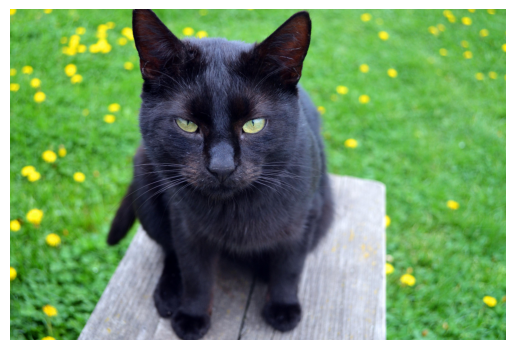

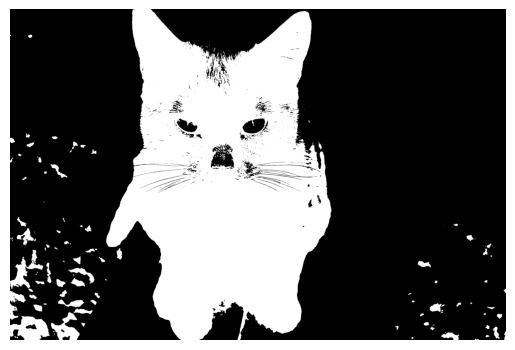

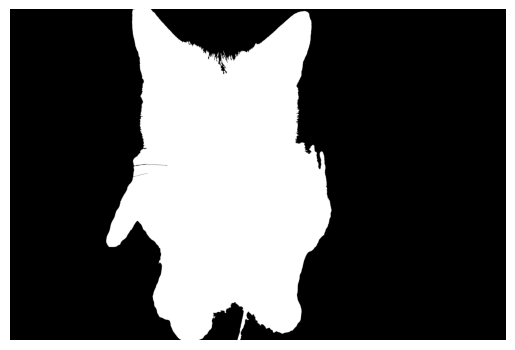

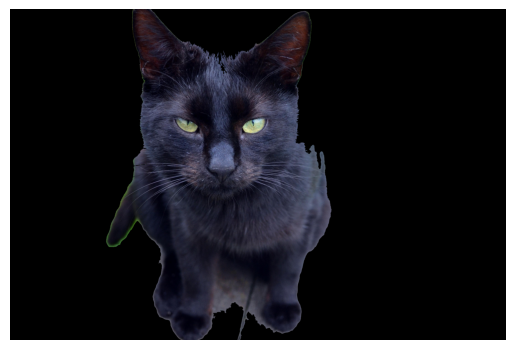

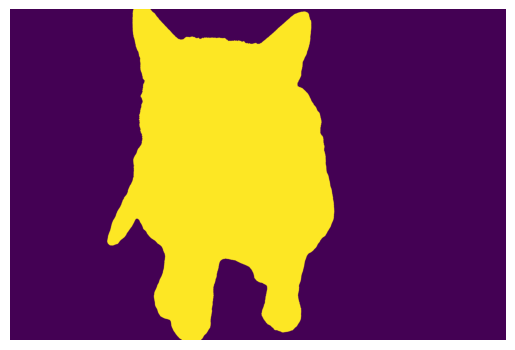

Dice:  0.9417804997884924


In [ ]:
# Thresholding and Contour

# Original Image
image3 = cv.cvtColor(cv.imread("image3.jpg"), cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image3)
plt.show()

# Convert to grayscale
gray = cv.cvtColor(image3, cv.COLOR_RGB2GRAY)

# Blur
blur = cv.GaussianBlur(gray, (5, 5), 0)

# Inverse threshold binarization
# Otsu automatic threshold
ret, thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Mask before countour
plt.axis("off")
plt.imshow(thresh, cmap='gray')
plt.show()

# Find contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Get the biggest countour
contour = max(contours, key=cv.contourArea)

# Create a mask filled with max contour
mask = np.zeros(gray.shape, np.uint8)
cv.drawContours(mask, [contour], -1, 255, thickness=cv.FILLED)

# Mask
plt.axis("off")
plt.imshow(mask, cmap='gray')
plt.show()

# Apply mask
threshold = cv.bitwise_and(image3, image3, mask=mask)

# Image after threshold and countour
plt.axis("off")
plt.imshow(threshold)
plt.show()

# Dice
myImage = cv.imread("image3_cut.jpg")
ret, myMask = cv.threshold(cv.cvtColor(myImage, cv.COLOR_BGR2GRAY), 245, 255, cv.THRESH_BINARY)
myMaskBin = (myMask > 0).astype(np.uint8)
intersections = np.sum(mask * myMaskBin)
sumMyMaskBin = np.sum(myMaskBin)
sumMask = np.sum(mask)

# Mask from image
plt.axis("off")
plt.imshow(myMaskBin)
plt.show()

# Dice
dice = 2.0 * intersections / (sumMask + sumMask)
print("Dice: ", dice)